In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
%matplotlib inline

In [8]:
#List of folders in chest xray 

In [2]:
print(os.listdir("chest_xray"))

['val', 'test', '.DS_Store', 'train']


In [9]:
#intialize train and test directory to train_dir and test_dir

In [3]:
TRAIN_DIR = "chest_xray/train/"
TEST_DIR =  "chest_xray/test/"

In [10]:
#The function below to get the label of the associated with the image

In [4]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [5]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [6]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        #The if loop takes the directory under observation and gets the labels of the folders and assigns labels.
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            #This give the path to the actual images i.e. chest_xrays/train/NORMAL/  
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):#The tqdm is used to show the working of for loop in a progress bar
                #The image file is read
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    #The below line resizes the image into a 150,150,3 shape
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #Then the image is taken as an array.
                    img = np.asarray(img)
                    X.append(img)
                    #The label is appended to the image
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [7]:
X_train, y_train = get_data(TRAIN_DIR)

  0%|          | 0/3876 [00:00<?, ?it/s]/home/tadinve/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 1342/1342 [03:07<00:00,  7.15it/s]


In [11]:
X_test, y_test = get_data(TEST_DIR)

  0%|          | 0/390 [00:00<?, ?it/s]/home/tadinve/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 234/234 [00:33<00:00,  6.99it/s]


In [19]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [20]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [29]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [30]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2) #to_categorical converts the output into a binary matrix
y_test = to_categorical(y_test, 2)

/home/tadinve/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
y_test[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [32]:
print(y_train.shape,'\n',y_test.shape)

(5216, 2) 
 (624, 2)


In [33]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

/home/tadinve/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


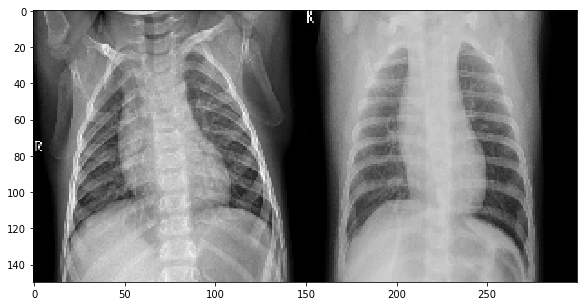

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


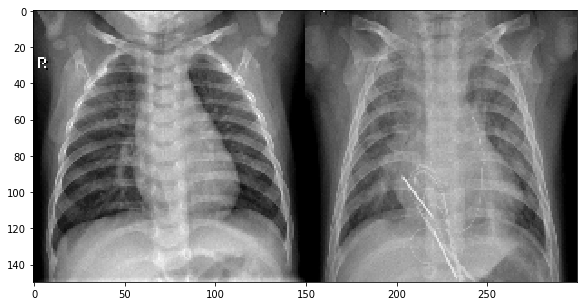

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


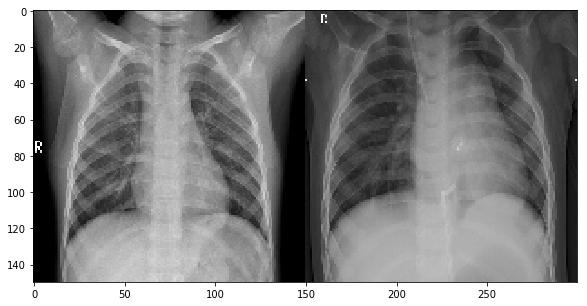

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


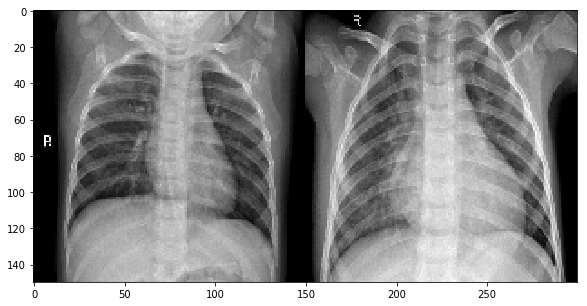

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


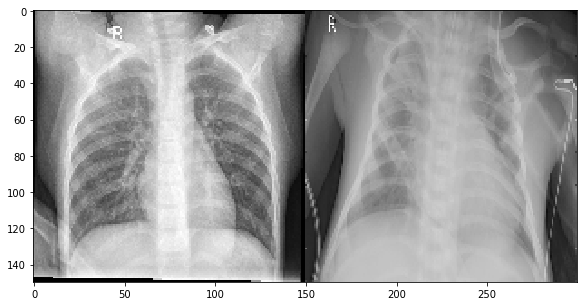

In [36]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'constant')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [48]:
y_train[:5].sum(axis=0)

array([0., 5.], dtype=float32)

In [42]:
y_train.sum(axis=0)

array([1341., 3875.], dtype=float32)

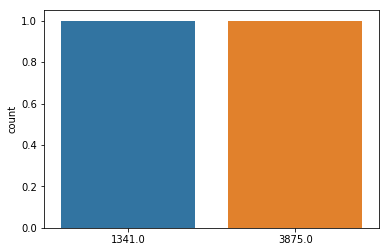

In [37]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [49]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/home/tadinve/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:999: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [85]:
filepath="weights_2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')

In [86]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [87]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

In [88]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

In [89]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

In [90]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 16, 150, 150)      448       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 150, 150)      2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 75, 75)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 75, 75)        4640      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 75, 75)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 37, 37)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 37, 37)        18496     
__________

In [91]:
batch_size = 256
epochs = 6

In [92]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/6
5216/5216 [==============================] - 631s 121ms/step - loss: 0.5803 - acc: 0.7425 - val_loss: 0.6680 - val_acc: 0.6250

Epoch 00001: saving model to weights_2.hdf5
Epoch 2/6
5216/5216 [==============================] - 630s 121ms/step - loss: 0.5331 - acc: 0.7429 - val_loss: 0.5868 - val_acc: 0.6250

Epoch 00002: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00002: saving model to weights_2.hdf5
Epoch 3/6
5216/5216 [==============================] - 631s 121ms/step - loss: 0.4429 - acc: 0.7470 - val_loss: 0.5398 - val_acc: 0.6498

Epoch 00003: saving model to weights_2.hdf5
Epoch 4/6
5216/5216 [==============================] - 631s 121ms/step - loss: 0.4086 - acc: 0.7857 - val_loss: 0.5186 - val_acc: 0.7236

Epoch 00004: saving model to weights_2.hdf5
Epoch 5/6
5216/5216 [==============================] - 630s 121ms/step - loss: 0.3788 - acc: 0.8282 - val_loss: 0.4805 - val_acc: 0.7780

Epoch 

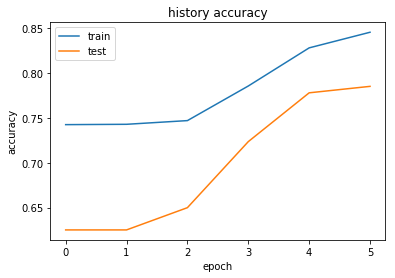

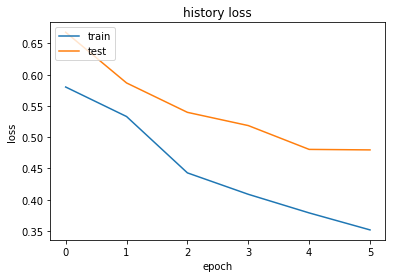

In [93]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('history accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('history loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

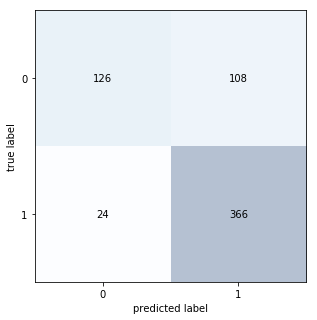

In [95]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [96]:
366 / (366 + 108)

0.7721518987341772

In [97]:
366 / (366 + 24)

0.9384615384615385

In [98]:
model.load_weights('weights_2.hdf5')

In [99]:
model.save('full_np_model_2.h5')

In [100]:
from keras.models import load_model
sample_model = load_model('full_np_model_2.h5',custom_objects={'swish_activation': swish_activation},compile = False)

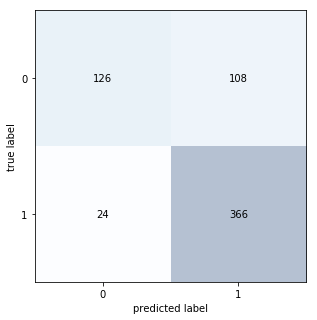

In [101]:
from sklearn.metrics import confusion_matrix
pred = sample_model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [102]:
366/(366+108)

0.7721518987341772

In [103]:
366/(366+24)

0.9384615384615385